### Problem statement:
To predict the balance of debt on the basis of age, cards (number of credit cards), education (years of education), income (in thousands of dollars), limit (credit limit), and rating (credit rating) using linear regression model.

### Description of the dataset
The  dataset contains information about credit card debt. 

Income - income in thousands of dollars

Limit - credit limit

Rating - credit rating

Cards - number of credit cards

Age - Age of the customer

Education - years of education

Own - house ownership

Student - student status

Married - marital status

Region - East, West or South

Balance - average credit card debt for each individual

### Target variable - Balance

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from scipy.stats import shapiro

%matplotlib inline

### Exploratory data analysis

In [2]:
#Loading the data
filepath=r"C:\Users\Itisha Sharma\Desktop\GitHub\Python_Linear regression_Credit\Dataset.csv"
df=pd.read_csv(filepath)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [3]:
#Understading the dimesnsions of the dataset
df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [5]:
#Checking for null values
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64

In [6]:
#Checking for mean, median mode of the data
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
#UNderstading the number of unique values each column has
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'Unique values in {column}: {unique_values}')
    print('---')

Unique values in Income: 399
---
Unique values in Limit: 387
---
Unique values in Rating: 283
---
Unique values in Cards: 9
---
Unique values in Age: 68
---
Unique values in Education: 16
---
Unique values in Own: 2
---
Unique values in Student: 2
---
Unique values in Married: 2
---
Unique values in Region: 3
---
Unique values in Balance: 284
---


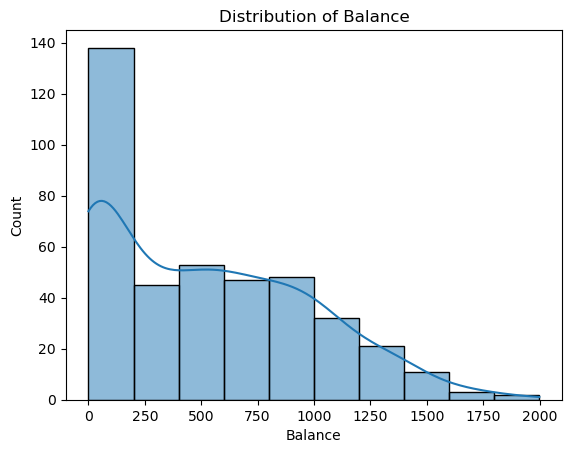

In [8]:
# Univariate Analysis for Balance
sns.histplot(df['Balance'], kde=True)
plt.title('Distribution of Balance')
plt.show()
#Majority number of people are having the balance between 0 and 250 and least are in the brackt of 1750 and 2000

C:\Users\EMSONS1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


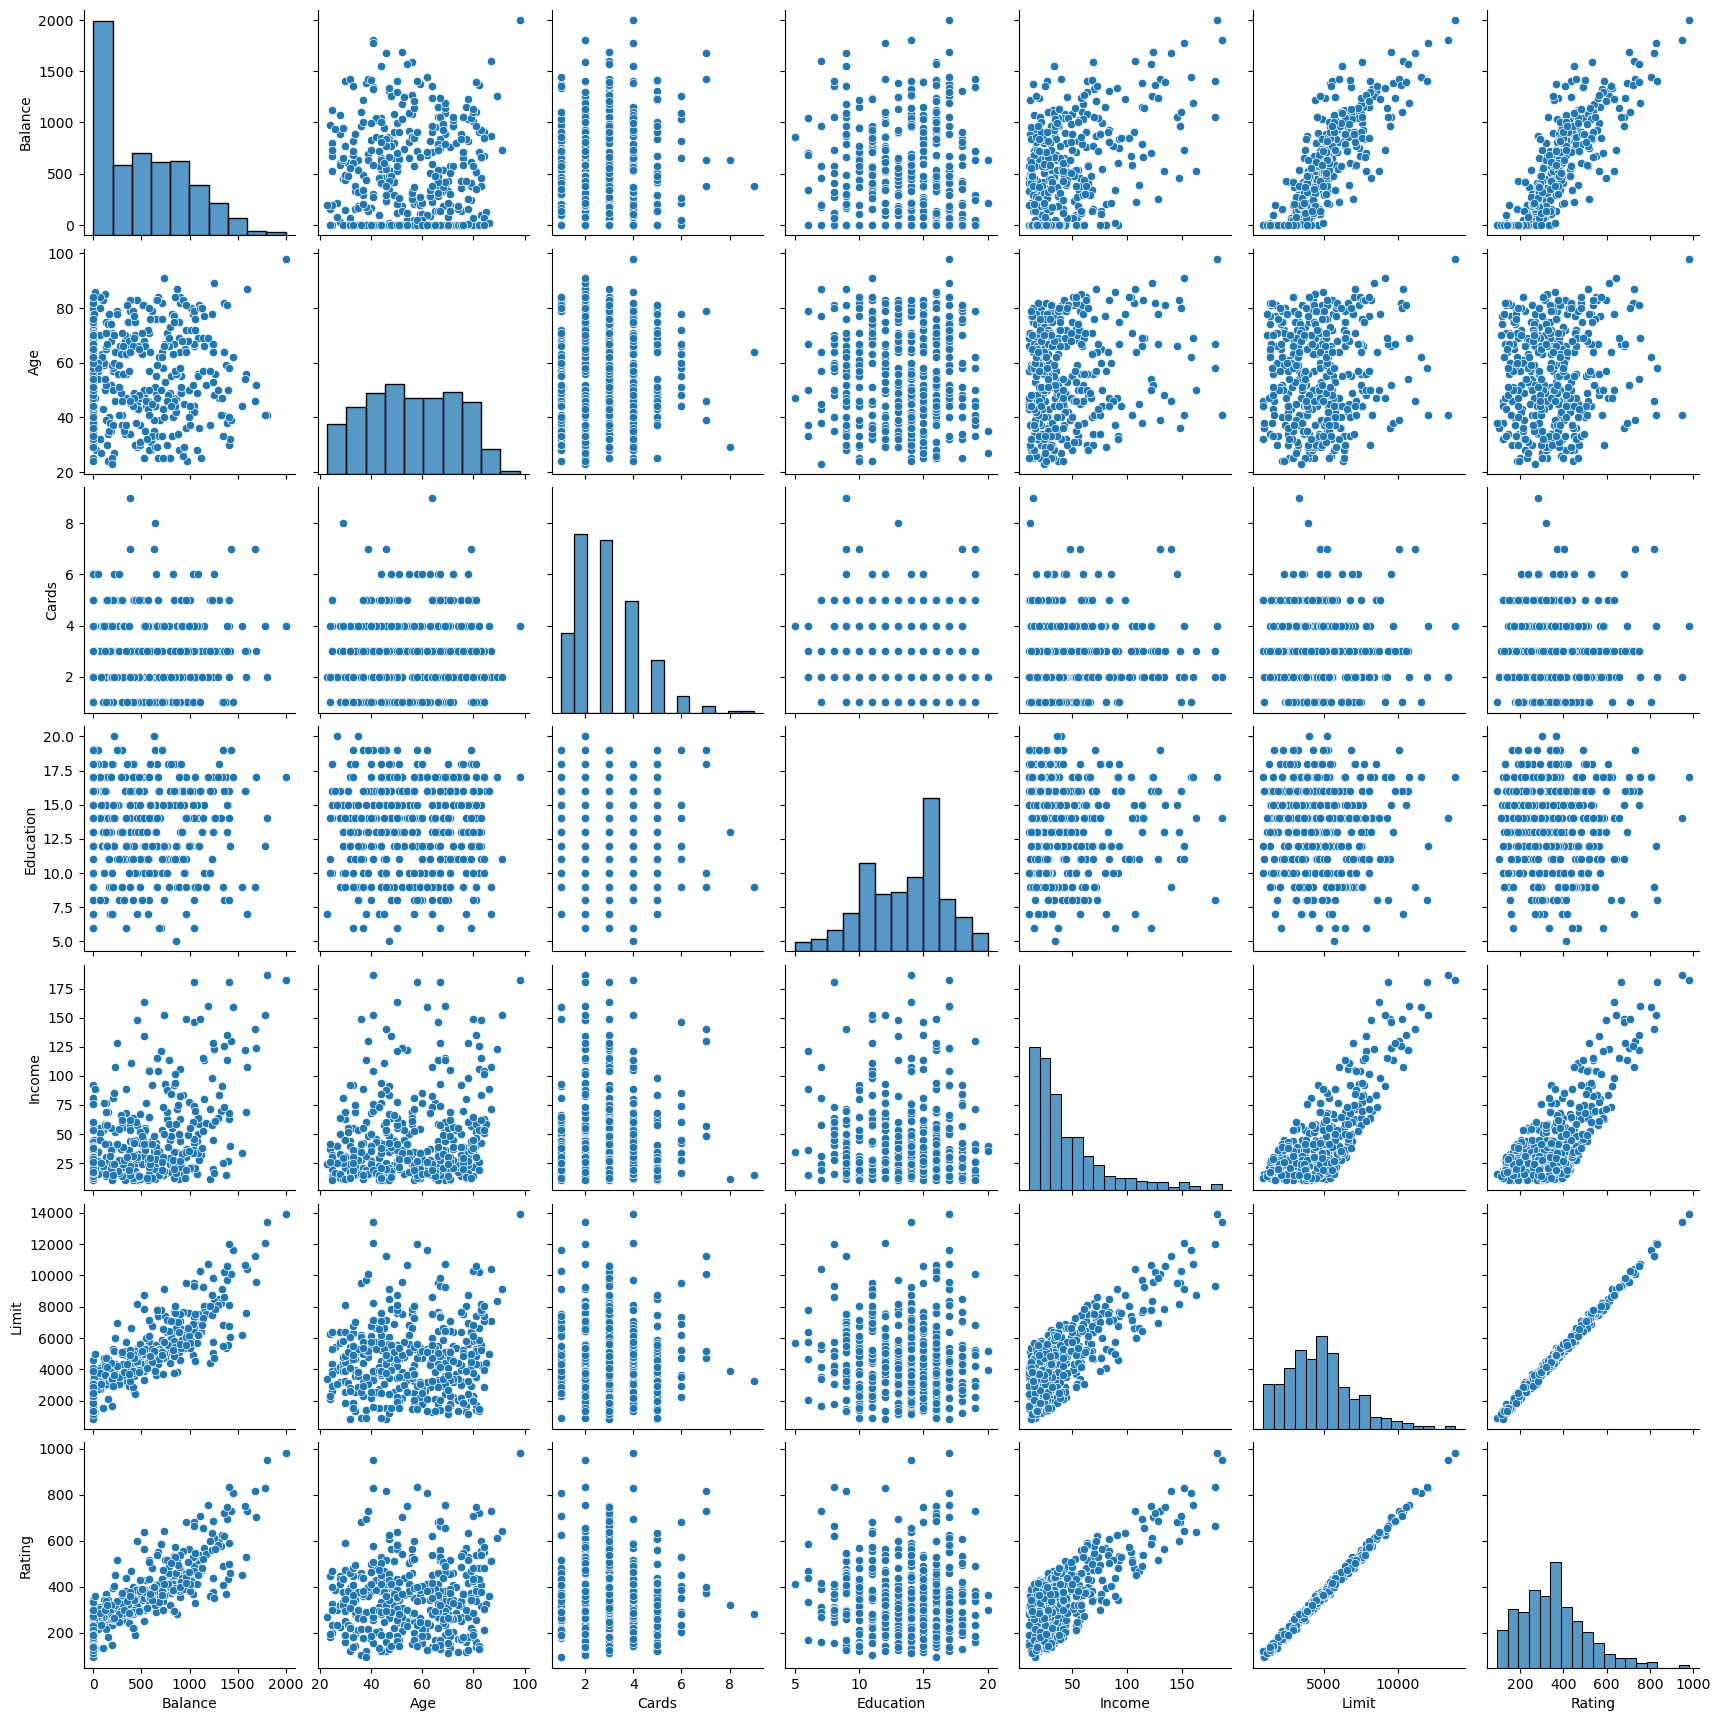

In [9]:
# Bivariate Analysis between numerical columns
sns.pairplot(df[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']])
plt.show()
#The digonal elements of the following plot shows the distribution of the data and we learn that none of the columns 
#is normally distributed
#There is correlation of Balance with Limit and rating


   Cards      Balance
0      1   531.137255
1      2   472.965217
2      3   492.063063
3      4   576.416667
4      5   523.000000
5      6   680.818182
6      7  1028.750000
7      8   638.000000
8      9   382.000000


<Axes: xlabel='Cards', ylabel='Balance'>

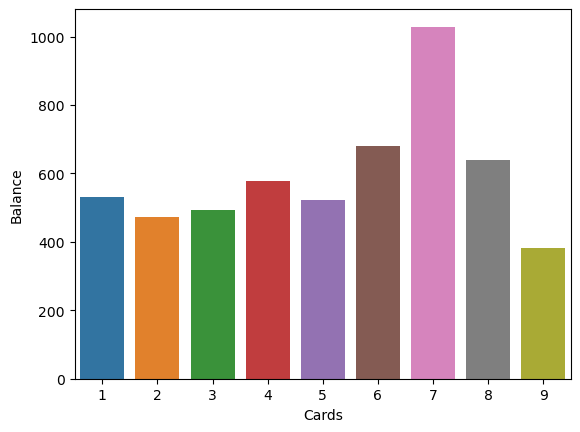

In [10]:
Balance_by_Cards = df.groupby('Cards')['Balance'].mean().reset_index()
print(Balance_by_Cards)
sns.barplot(x = 'Cards', y = 'Balance', data = Balance_by_Cards)
#The bar graph shows that the people with 7 cards have maximum balance

  Married     Balance
0      No  523.290323
1     Yes  517.942857


<Axes: xlabel='Married', ylabel='Balance'>

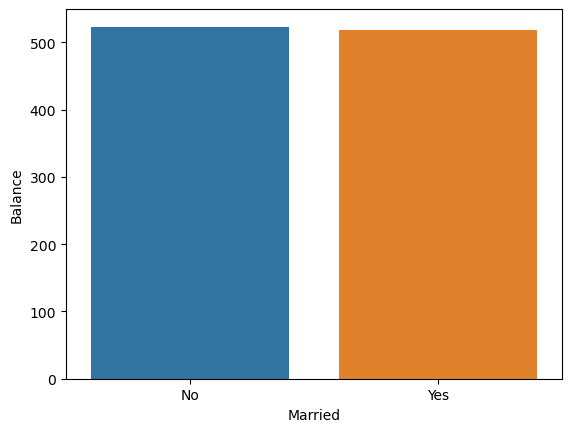

In [11]:
Balance_by_Married = df.groupby('Married')['Balance'].mean().reset_index()
print(Balance_by_Married)
sns.barplot(x = 'Married', y = 'Balance', data = Balance_by_Married)
#The mean of balance of unmarried people is slightly more that of married people but there is not much difference.

  Region     Balance
0   East  531.000000
1  South  518.497487
2   West  512.313725


<Axes: xlabel='Region', ylabel='Balance'>

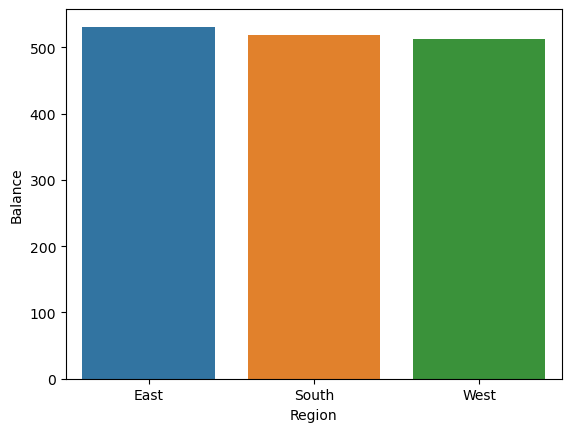

In [12]:
Balance_by_Region = df.groupby('Region')['Balance'].mean().reset_index()
print(Balance_by_Region)
sns.barplot(x = 'Region', y = 'Balance', data = Balance_by_Region)
#The mean of Balance of people in East is the highest and that of south and west show similar trend

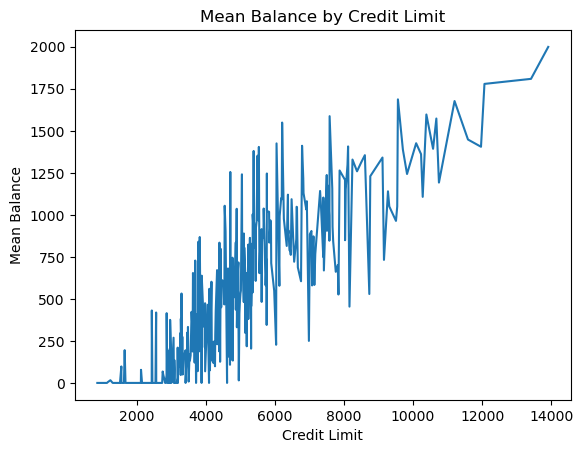

In [13]:
Balance_by_limit = df.groupby('Limit')['Balance'].mean().reset_index()

# Plotting a line graph
sns.lineplot(x='Limit', y='Balance', data=Balance_by_limit)

# Adding labels and title
plt.xlabel('Credit Limit')
plt.ylabel('Mean Balance')
plt.title('Mean Balance by Credit Limit')

# Show the plot
plt.show()

#We observe that as the mean credit limit incrases the mean balance also increases.

   Own     Balance
0   No  509.803109
1  Yes  529.536232


<Axes: xlabel='Own', ylabel='Balance'>

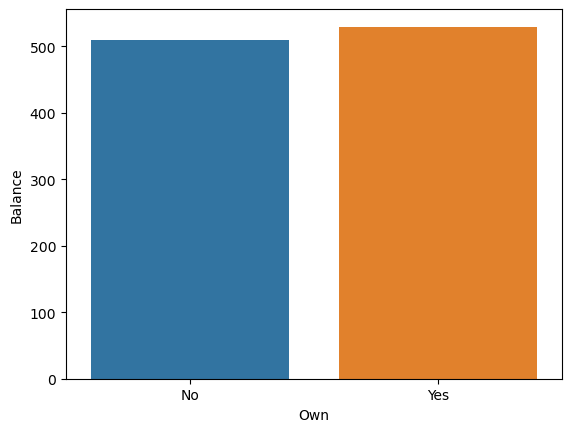

In [14]:
Balance_by_Own = df.groupby('Own')['Balance'].mean().reset_index()
print(Balance_by_Own)
sns.barplot(x = 'Own', y = 'Balance', data = Balance_by_Own)
#The mean of people having own income has more mean balance

  Student     Balance
0      No  480.369444
1     Yes  876.825000


<Axes: xlabel='Student', ylabel='Balance'>

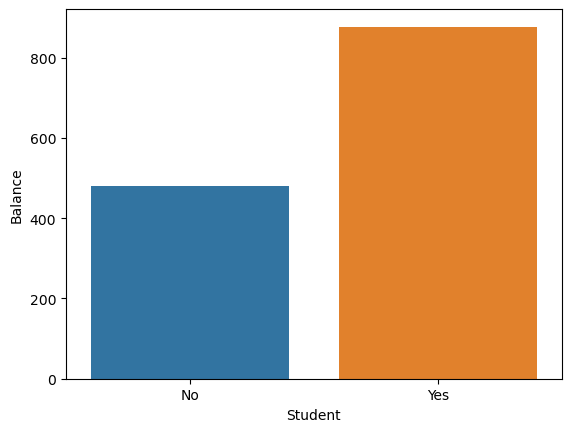

In [15]:
Balance_by_Student = df.groupby('Student')['Balance'].mean().reset_index()
print(Balance_by_Student)
sns.barplot(x = 'Student', y = 'Balance', data = Balance_by_Student)
#Students have more balance

### Data Prepration

In [16]:
# Splitting the target and indepdent columns
y=df['Balance']
X=df.drop(columns='Balance')
X.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region
0,14.891,3606,283,2,34,11,No,No,Yes,South
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West
2,104.593,7075,514,4,71,11,No,No,No,West
3,148.924,9504,681,3,36,11,Yes,No,No,West
4,55.882,4897,357,2,68,16,No,No,Yes,South


In [17]:
#Understadning the unique values 
for column in X.columns:
    unique_values = X[column].unique()
    print(f'Unique values in {column}: {unique_values}')
    print('---')

Unique values in Income: [ 14.891 106.025 104.593 148.924  55.882  80.18   20.996  71.408  15.125
  71.061  63.095  15.045  80.616  43.682  19.144  20.089  53.598  36.496
  49.57   42.079  17.7    37.348  20.103  64.027  10.742  14.09   42.471
  32.793 186.634  26.813  34.142  28.941 134.181  31.367  20.15   23.35
  62.413  30.007  11.795  13.647  34.95  113.659  44.158  36.929  31.861
  77.38   19.531  44.646  44.522  43.479  36.362  39.705  44.205  16.304
  15.333  32.916  57.1    76.273  10.354  51.872  35.51   21.238  30.682
  14.132  32.164  12.    113.829  11.187  27.847  49.502  24.889  58.781
  22.939  23.989  16.103  33.017  30.622  20.936 110.968  15.354  27.369
  53.48   23.672  19.225  43.54  152.298  55.367  11.741  15.56   59.53
  20.191  48.498  30.733  16.479  38.009  14.084  14.312  26.067  36.295
  83.851  21.153  17.976  68.713 146.183  15.846  12.031  16.819  39.11
 107.986  13.561  34.537  28.575  46.007  69.251  16.482  40.442  35.177
  91.362  27.039  23.012  27.

In [18]:
# Encoding the categorical columns of 'Own', 'Student', 'Married', 'Region'
label_encoder = LabelEncoder()
X['Own'] = label_encoder.fit_transform(X['Own'])
X['Student'] = label_encoder.fit_transform(X['Student'])
X['Married'] = label_encoder.fit_transform(X['Married'])
X['Region'] = label_encoder.fit_transform(X['Region'])

print(X.head())

    Income  Limit  Rating  Cards  Age  Education  Own  Student  Married  \
0   14.891   3606     283      2   34         11    0        0        1   
1  106.025   6645     483      3   82         15    1        1        1   
2  104.593   7075     514      4   71         11    0        0        0   
3  148.924   9504     681      3   36         11    1        0        0   
4   55.882   4897     357      2   68         16    0        0        1   

   Region  
0       1  
1       2  
2       2  
3       2  
4       1  


In [19]:
X.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Own            int32
Student        int32
Married        int32
Region         int32
dtype: object

### Outlier analysis of raw data

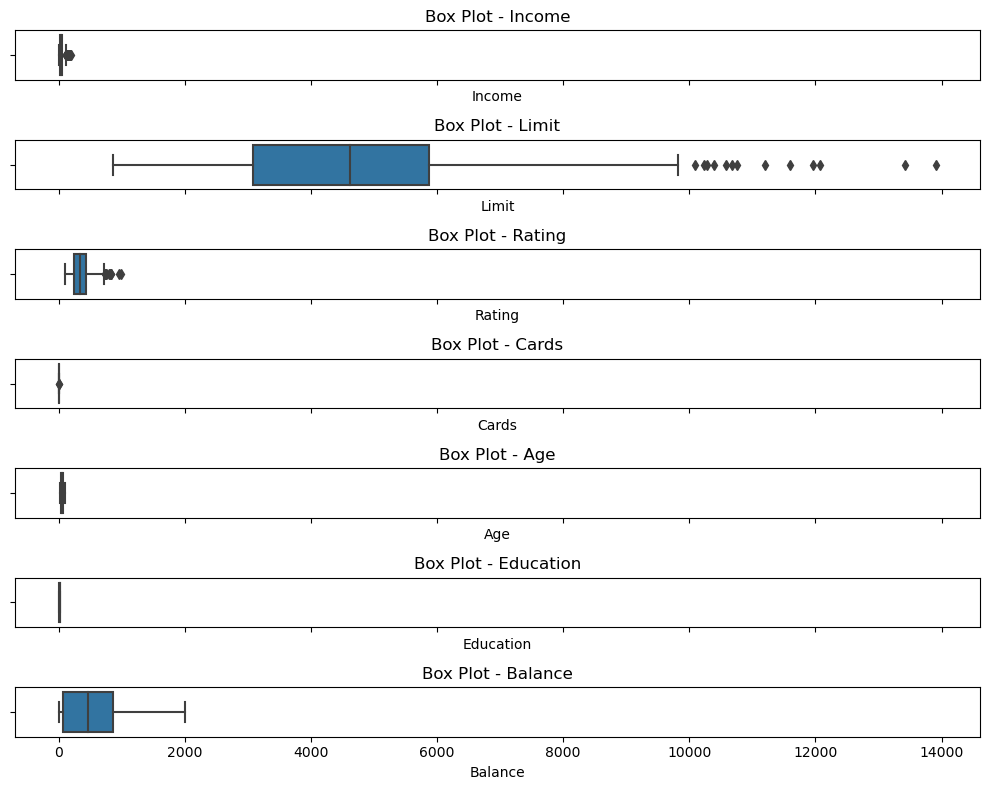

In [20]:
#Making the box plot of numeric columns
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 8), sharex=True)

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

#Limit has maximum outliers
#Balance has no outlier

### Designing the model

In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the independent variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Coefficient of determination R-squared: {r2}")

Mean Squared Error: 7938.236602593404
Coefficient of determination R-squared: 0.9524865889506823


We have a high MSE.

R-square is the ratio of variance explained by the model to total variance.

The value of R-square should be between 0 and 1; the higher the better fit is the model. Therefore, out model is a great fit.


In [22]:
#Accessing coefficients and corresponding feature names
coefficients = model.coef_
feature_names = X.columns

# Creating a DataFrame to display coefficients
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Displaying the DataFrame
print(coefficients_df)

# Identifying the variable with the most substantial influence
most_influential_variable = coefficients_df.loc[coefficients_df['Coefficient'].idxmax()]
print(f"The most influential variable is: {most_influential_variable['Feature']} with coefficient {most_influential_variable['Coefficient']}")


     Feature  Coefficient
0     Income  -266.628317
1      Limit   473.953688
2     Rating   156.468886
3      Cards    26.525970
4        Age   -10.163062
5  Education    -3.425393
6        Own    -6.236945
7    Student   121.899756
8    Married    -2.886989
9     Region     4.732289
The most influential variable is: Limit with coefficient 473.9536879067077


In [23]:
correlation = np.corrcoef(predictions, y_test)[0,1]
print(f"Correlation between Predictions and Actual Values: {correlation}")
#This proves that our model is a great fit

Correlation between Predictions and Actual Values: 0.980175494842064


### Checking the adherence to the OLS conditions and residual analysis

<Axes: >

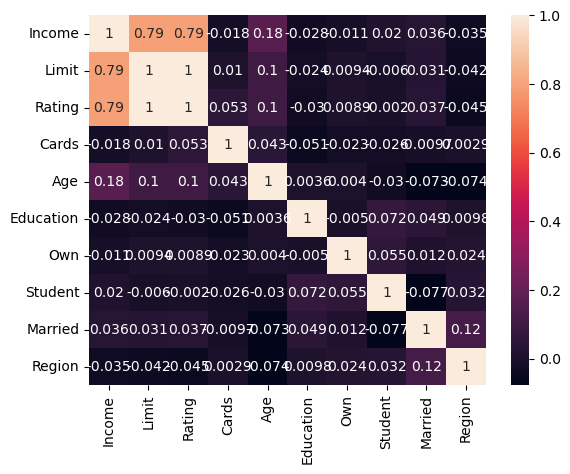

In [24]:
# Checking for multicollinearity among independent variables
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)


Multicollinearity is correlation between the independent variables

Considering the value of correlation >=0.7, we find that the variable Limit and Rating are highly correlated with Income.

Therefore, there is multicollinearity.

Implication: If multicollinearity is present, it may inflate standard errors, making some variables appear statistically insignificant. 

Text(0.5, 1.0, 'Residual plot')

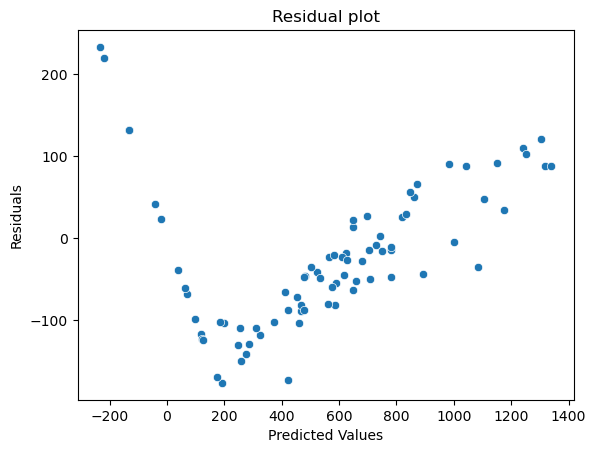

In [25]:
# Independence of residuals
residuals = y_test - predictions
sns.scatterplot(x=predictions, y=residuals)
# Label the axes and add a legend
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')

The above scatter plot shows correlation between the predictions and residuals. Therefore, the residuals are not independent

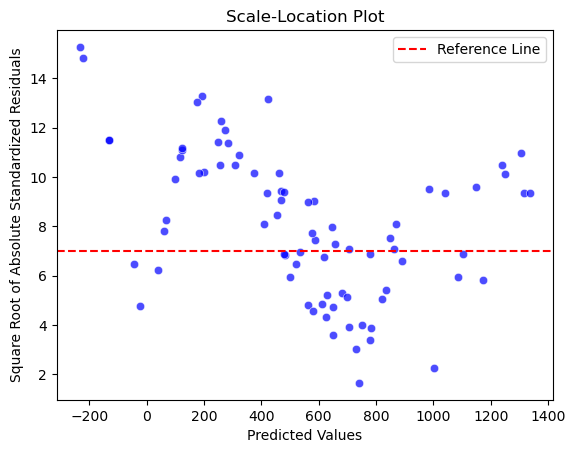

In [26]:
# Homoscedasticity

# Scatter plot of sqrt(abs(standardized residuals)) against predicted values
sns.scatterplot(x=predictions, y=np.sqrt(np.abs(residuals)), color='blue', alpha=0.7)

# Add a horizontal line at y=7 for reference
plt.axhline(y=7, color='red', linestyle='--', label='Reference Line')

# Label the axes and add a legend
plt.xlabel('Predicted Values')
plt.ylabel('Square Root of Absolute Standardized Residuals')
plt.title('Scale-Location Plot')
plt.legend()

# Show the plot
plt.show()


Homoscedasticity means that the error terms must have constant variance or the spread of errors or residuals is the same across the range of observed values of the independent variable.

It uses the standardized (square root of residual) value of residual.

In case of homoscedasticity, the above graph should show a horizontal line. 

Therefore, there is no homoscedasticity and therefire could lead to inefficient estimates and biased standard errors.


In [27]:
#Performing the Breusch-Pagan test to confirm the grpah above
X_test_with_const = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
test_statistic, p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is evidence of heteroscedasticity (reject the null hypothesis).")
else:
    print("There is homoscedasticity (fail to reject the null hypothesis).")

There is evidence of heteroscedasticity (reject the null hypothesis).


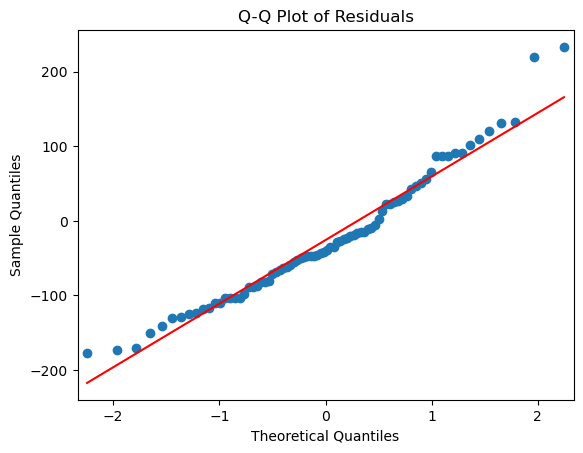

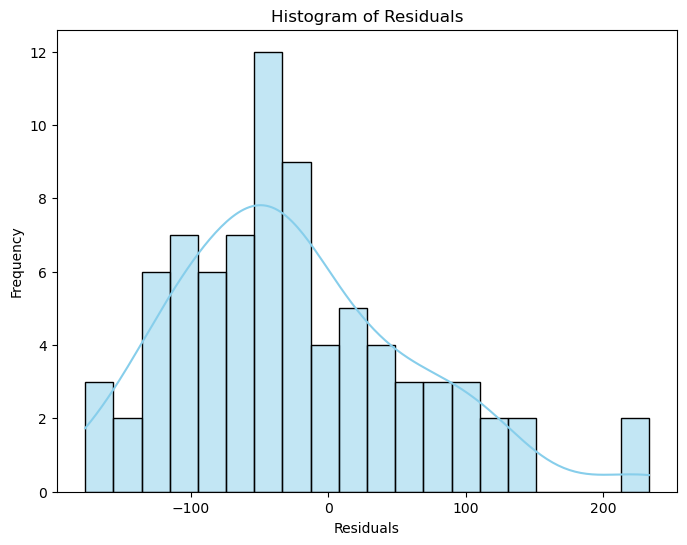

In [28]:
# Normality of residuals i.e. of the data comes from a normal distrubution or not

# Create a Q-Q plot
sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.title('Q-Q Plot of Residuals')

# Show the Q-Q plot
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

#  High bias: The model’s predictions are consistently biased away from the true values.
#  Low variance: The model’s predictions are relatively stable across different samples .


The Shapiro-Wilk test is a statistical hypothesis test designed to assess the normality of a dataset. It examines a sample from the perspective of the null hypothesis, which assumes that the dataset follows a normal distribution. A higher p-value suggests conformity to normal distribution characteristics, while a lower p-value suggests deviation from normal distribution.

In [29]:
#Performing the Shapiro-Wilk test for checking the normality of residuals
statistic, p_value = shapiro(residuals)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")

Shapiro-Wilk Test Statistic: 0.9630709886550903
P-Value: 0.020776355639100075
The data does not follow a normal distribution (reject the null hypothesis).


Since the error terms are not not normally distrubited, following vcan be the implications:

Error in estimates

The Type I error rate (probability of incorrectly rejecting a true null hypothesis) may be inflated. 

### Bias-Variance Trade-off

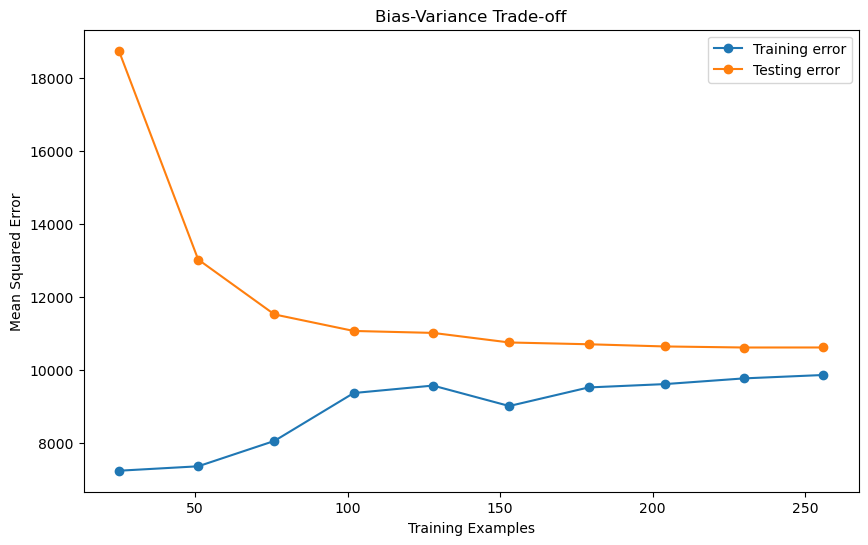

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot bias-variance trade-off graph
def plot_bias_variance_tradeoff(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = -np.mean(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training error', marker='o')
    plt.plot(train_sizes, test_mean, label='Testing error', marker='o')

    plt.title('Bias-Variance Trade-off')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Assuming X_train and y_train are your training data
plot_bias_variance_tradeoff(model, X_train_scaled, y_train)



High Bias (Underfitting): Consistent errors across different datasets, leading to a high MSE.
High Variance (Overfitting): Excellent performance on the training data but poor generalization to new data, resulting in a high MSE. As MSE is decreasing with the increase in training samples in case of trained data,therefore there is overfitting.
MSE is increasing with the training samples in the case of test data, therefore there is underfitting. But since the MSE for both training and test have reached the same point therefor we have balanced the bias and variance.